## PCA: How to calculate the principal components?


1. Standardize the Data
2. Compute the Covariance Matrix
3. Compute the Eigenvectors and Eigenvalues of the Covariance Matrix
4. Sort the Eigenvalues and Eigenvectors
5. Select the Top k Principal Components
6. Project the Data onto the New Principal Components


A 4x4 standardized data matrix is defined. Following this, the covariance matrix of the data is computed using the `np.cov` function with the `rowvar` argument set to `False` to indicate that each row represents an observation. Finally, the `eigenvalues` and `eigenvectors` of the covariance matrix are computed using the `np.linalg.eig` function.

In [1]:
import numpy as np

# Assuming the data is already standardized
data = np.array([
    [2.5, 2.4, 3.5, 2.2],
    [0.5, 0.7, 2.9, 1.9],
    [2.2, 2.9, 3.1, 3.0],
    [1.9, 2.2, 3.0, 2.1]
])

# Compute the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [2]:
cov_matrix

array([[0.7825    , 0.785     , 0.1775    , 0.23666667],
       [0.785     , 0.89666667, 0.13166667, 0.35666667],
       [0.1775    , 0.13166667, 0.06916667, 0.02      ],
       [0.23666667, 0.35666667, 0.02      , 0.23333333]])

In [3]:
eigenvalues

array([ 1.77186614e+00,  1.80422627e-01, -1.06554190e-18,  2.93779008e-02])

In [4]:
eigenvectors

array([[ 0.64548535,  0.4946439 ,  0.57887573,  0.05982446],
       [ 0.70554023, -0.23815523, -0.5431304 , -0.387949  ],
       [ 0.12495412,  0.37284231, -0.535187  ,  0.74762956],
       [ 0.26447706, -0.7480629 ,  0.2889414 ,  0.53569268]])

Here, the equality `Σv=λv` is being checked. This is essentially verifying the characteristic equation of eigenvalues and eigenvectors using the covariance matrix (`Σ`), eigenvalues (`λ`), and eigenvectors (`v`). The `np.matmul` function is used for matrix multiplication of the covariance matrix and the eigenvectors, and this result is checked for equality against the product of eigenvalues and eigenvectors.

In [5]:
np.matmul(cov_matrix, eigenvectors)

array([[ 1.14371363e+00,  8.92449525e-02, -9.71445147e-17,
         1.75751695e-03],
       [ 1.25012285e+00, -4.29685929e-02,  6.93889390e-17,
        -1.13971273e-02],
       [ 2.21401981e-01,  6.72691888e-02,  6.07153217e-18,
         2.19637870e-02],
       [ 4.68617945e-01, -1.34967474e-01,  2.77555756e-17,
         1.57375264e-02]])

In [6]:
eigenvalues * eigenvectors

array([[ 1.14371363e+00,  8.92449525e-02, -6.16816348e-19,
         1.75751695e-03],
       [ 1.25012285e+00, -4.29685929e-02,  5.78728203e-19,
        -1.13971273e-02],
       [ 2.21401981e-01,  6.72691888e-02,  5.70264171e-19,
         2.19637870e-02],
       [ 4.68617945e-01, -1.34967474e-01, -3.07879172e-19,
         1.57375264e-02]])

The eigenvalues and corresponding eigenvectors are sorted in descending order based on the eigenvalues using `np.argsort`. This sorting is crucial as it arranges the eigenvalues (and corresponding eigenvectors) from the most to the least significant in terms of explaining the variance in the data. Next, the explained variance ratio is computed by dividing each eigenvalue by the sum of all eigenvalues. The cumulative explained variance is then computed using `np.cumsum`, which will help to understand how much variance is explained by the first `N` principal components.

In [7]:
# Sort the eigenvalues and eigenvectors by descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Output eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Calculate the explained variance
explained_variance_ratio = eigenvalues / eigenvalues.sum()
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Output explained variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Eigenvalues: [ 1.77186614e+00  1.80422627e-01  2.93779008e-02 -1.06554190e-18]
Eigenvectors:
 [[ 0.64548535  0.4946439   0.05982446  0.57887573]
 [ 0.70554023 -0.23815523 -0.387949   -0.5431304 ]
 [ 0.12495412  0.37284231  0.74762956 -0.535187  ]
 [ 0.26447706 -0.7480629   0.53569268  0.2889414 ]]
Explained Variance Ratio: [ 8.94129254e-01  9.10459009e-02  1.48248448e-02 -5.37699867e-19]
Cumulative Explained Variance: [0.89412925 0.98517516 1.         1.        ]


The first two principal components are selected by extracting the first two columns of the eigenvectors matrix. The data is then projected onto a lower-dimensional subspace spanned by these two principal components using the dot product. This essentially reduces the dimensionality of the data while retaining the most significant patterns of variance.

In [8]:
# Select the first two principal components
pc1, pc2 = eigenvectors[:, 0], eigenvectors[:, 1]

# Project the data onto the lower-dimensional subspace
projected_data = np.dot(data - np.mean(data, axis=0), np.array([pc1, pc2]).T)

# Output projected data
print("Projected Data:\n", projected_data)


Projected Data:
 [[ 0.73532605  0.48988465]
 [-1.90937863 -0.09382577]
 [ 1.05605056 -0.52517338]
 [ 0.11800203  0.12911449]]


PCA is performed using scikit-learn's PCA implementation. Note that, the principal components computed by scikit-learn are the ones obtained using the our implementation earlier.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)


PCA(n_components=2)

In [10]:
print("Components calculated by us", pca.components_)
print("Components given by sklearn", np.array([pc1, pc2]))

Components calculated by us [[-0.64548535 -0.70554023 -0.12495412 -0.26447706]
 [-0.4946439   0.23815523 -0.37284231  0.7480629 ]]
Components given by sklearn [[ 0.64548535  0.70554023  0.12495412  0.26447706]
 [ 0.4946439  -0.23815523  0.37284231 -0.7480629 ]]


In [11]:
pca.transform(data)

array([[-0.73532605, -0.48988465],
       [ 1.90937863,  0.09382577],
       [-1.05605056,  0.52517338],
       [-0.11800203, -0.12911449]])

# PCA: Toy example with the Iris dataset

We will show the use of the `PCA` method to find principal components and for dimensionality reduction.

We will use the dataset [Iris](https://es.wikipedia.org/wiki/Set_of_data_flor_iris). These are measurements on the shape of different types of iris flowers and their respective types. It will be very suitable for visualizing the principal components.

In [12]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_87989/3553520274.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [13]:
from sklearn import datasets

numpy.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

We load our Iris dataset. The feature matrix has 150 rows and 4 columns:

$$X \in \mathbb{R}^{150 \times 4}$$

In [14]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [15]:
# To make visualizations more easily, we will construct a DataFrame with the
# matrix of values
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_as_dict = {
      col_name: X[:,col_id] for col_id, col_name in enumerate(columns)
  }
data_as_dict['label'] = y.astype('str')
X_df = pandas.DataFrame(data=data_as_dict)

We will first discuss what it means to "project" the data to a new dimension. The following image shows the projection $\overrightarrow a_1 = (8, 0)$ of the vector $ \overrightarrow a = (8, 5) $ onto the horizontal axis.

![picture](https://vzahorui.net/assets/images/linear_algebra/vectors_and_cosine.png)


The same type of operation is performed on the vectors of the data set. When visualizing two columns with a Scatterplot, each vector $x_i \in \mathbb{R}^4$ (which corresponds to one row), is represented only as a two-dimensional vector. You can think of each of these points as being "projected" to a single dimension to plot the distribution of each column with the side stripplots.

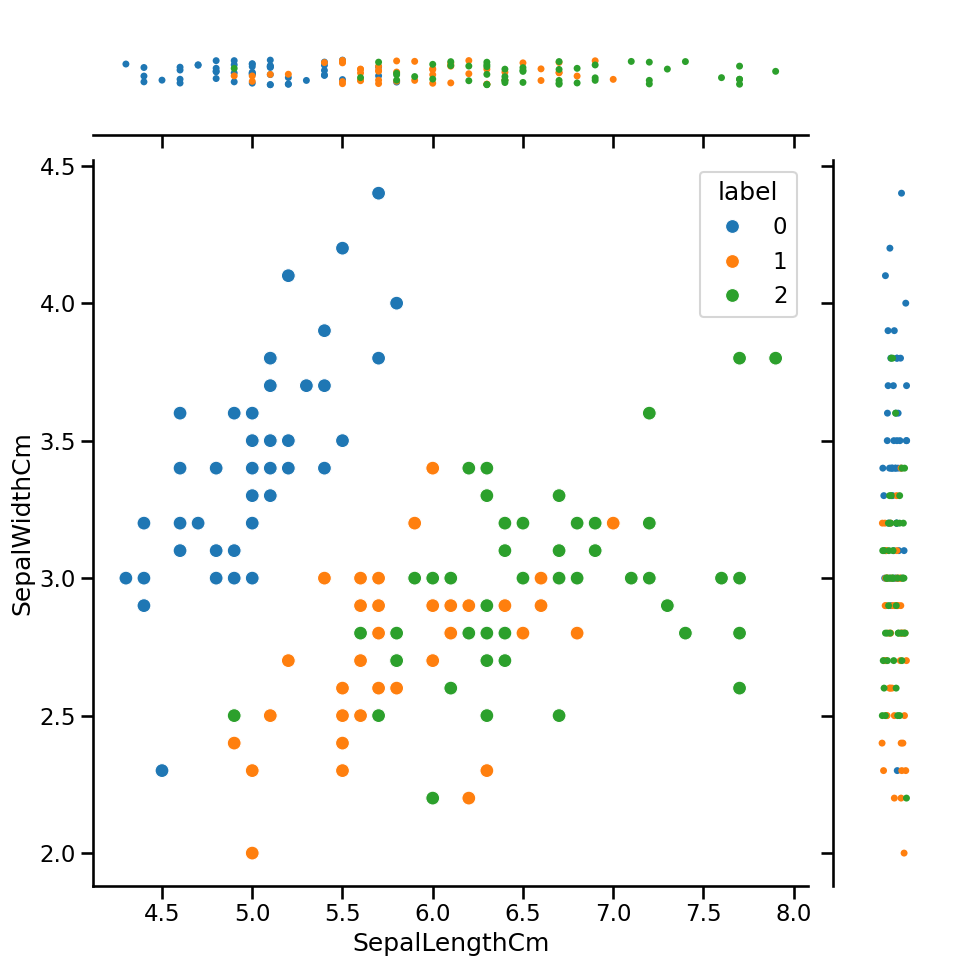

In [16]:
g = seaborn.JointGrid(data=X_df, x='SepalLengthCm', y='SepalWidthCm',
                      height=10, hue='label')
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

If the data is visualized through 2D Scatterplots, we can see how each pair of variables is jointly distributed. The `seaborn.pairplot` plot also shows the distribution of each variable separately using histograms.

Each of these graphs is a *projection* of the initial matrix to a smaller number of dimensions. In this case, the same original dimensions are used, that is, the pre-existing columns, but there are other forms of projection.

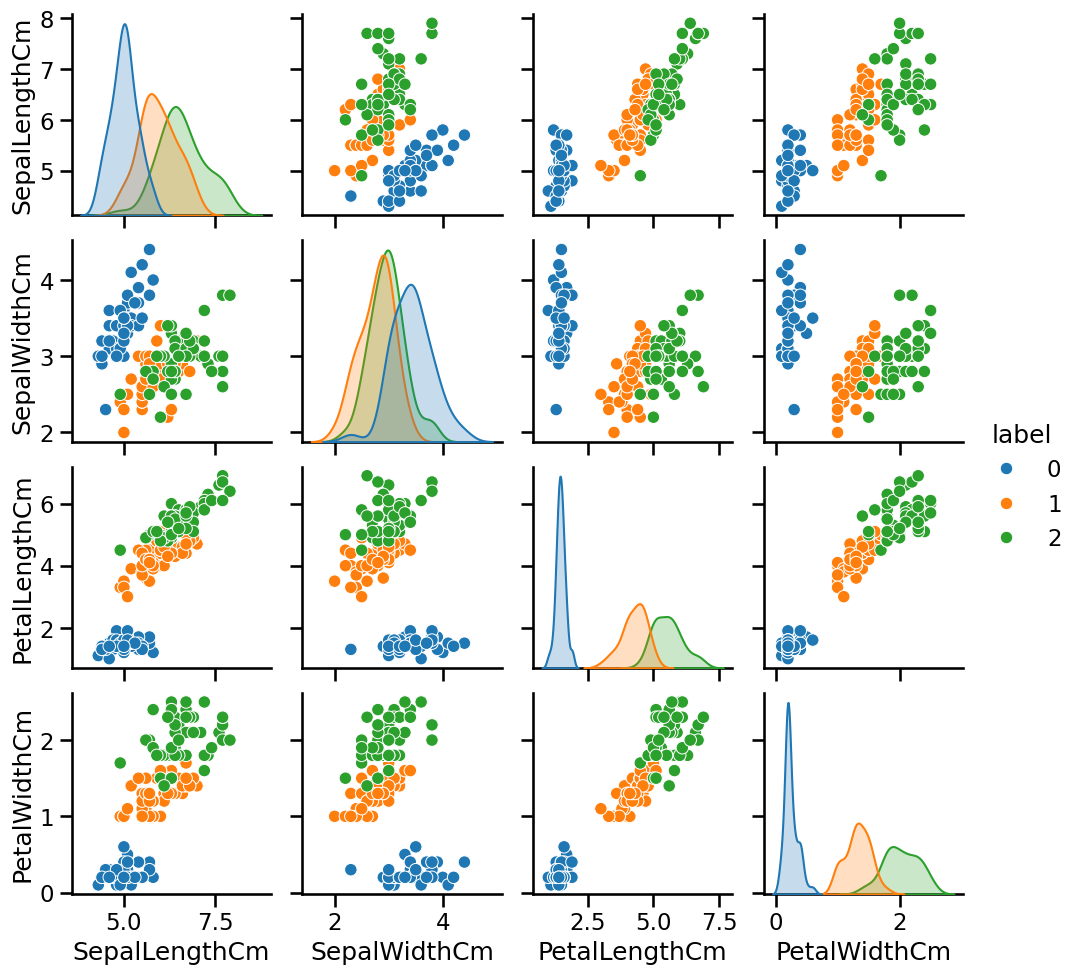

In [17]:
seaborn.pairplot(data=X_df, hue='label')

# Dimensionality reduction

In order to carry out a visual analysis, we will limit ourselves to working in a single dimension. That is, it seeks to choose a single column.

**If the goal is to predict the `label` column, which column helps us best separate our data?**

Removing all columns allows you to reduce the dimensionality, but as a consequence a lot of information is lost. There are methods that combine the information from all the original columns into a single dimension. One of them is Principal Component Analysis or **PCA**.

PCA is an algebraic method that allows us to calculate the principal components of a matrix. Principal components are *addresses* in our data space $R^{4}$ (more specifically they are linear combinations of the data). These components or directions are calculated in such a way that:
* They are orthogonal, that is, they are not correlated.
* They are ordered according to the level of variance of the original data they represent.

Using these components, a linear projection of our data can be constructed to a new matrix Z where each column is now in the direction of a principal component. Then, a subset of the first $d$ columns is selected to form the matrix $Z$. From the properties of the principal components, we know that we have lost the least amount of variance from our data.

We will use the [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implemented in the scikit-learn library. The `fit` method computes the principal components of the original array, which we can then access through the attributes of the `pca` instance.

### Example 1: Projection of $R^2$ onto $R^2$

For the purpose of visualizing the transformation, we will use only two columns of the matrix X.

When training the `PCA` class instance, sklearn takes care of centering the data by subtracting the mean. However, it is recommended to also *standardize* or at least *scale* the original array to ensure that all variables are in the same units and none have too large a weight.

In [18]:
cols_to_project = ['PetalLengthCm', 'PetalWidthCm']
cols_to_project_ids = [columns.index(col) for col in cols_to_project]

X_standard = ((X - X.mean(axis=0)) / X.std(axis=0))[:,cols_to_project_ids]

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_standard)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Explained variance: 
[1.97603902 0.03738379]
Explained variance ratio
[0.98143272 0.01856728]


The following graphic represents the main components. It can be seen that these are effectively the directions of greatest variation.

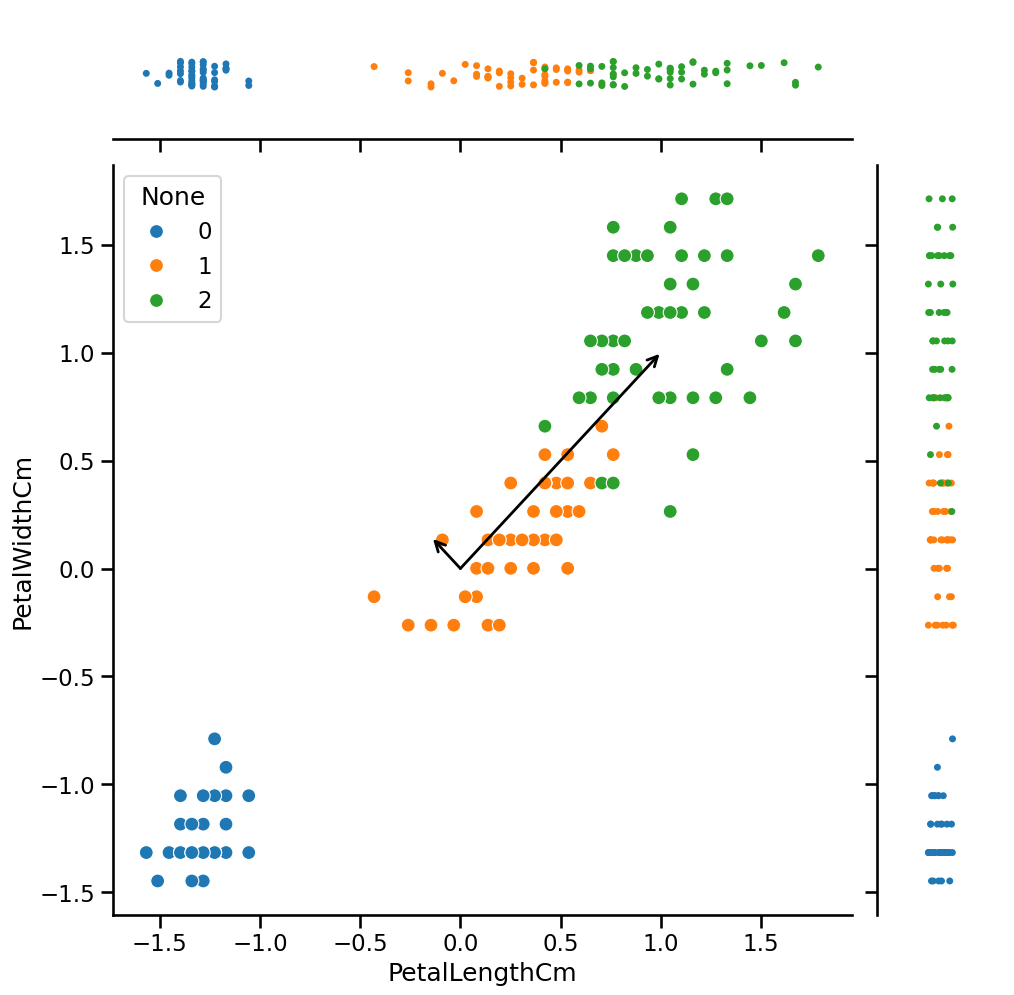

In [20]:
g = seaborn.JointGrid(x=X_standard[:,0], y=X_standard[:,1],
                      hue=X_df.label.values, height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)
ax = g.ax_joint.figure.axes[0]
ax.set(xlabel='PetalLengthCm', ylabel='PetalWidthCm')

for length, vector in zip(pca.explained_variance_, pca.components_):
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    v = vector * numpy.sqrt(length)
    ax.annotate( "",pca.mean_ + v, pca.mean_, arrowprops=arrowprops)

plt.show()


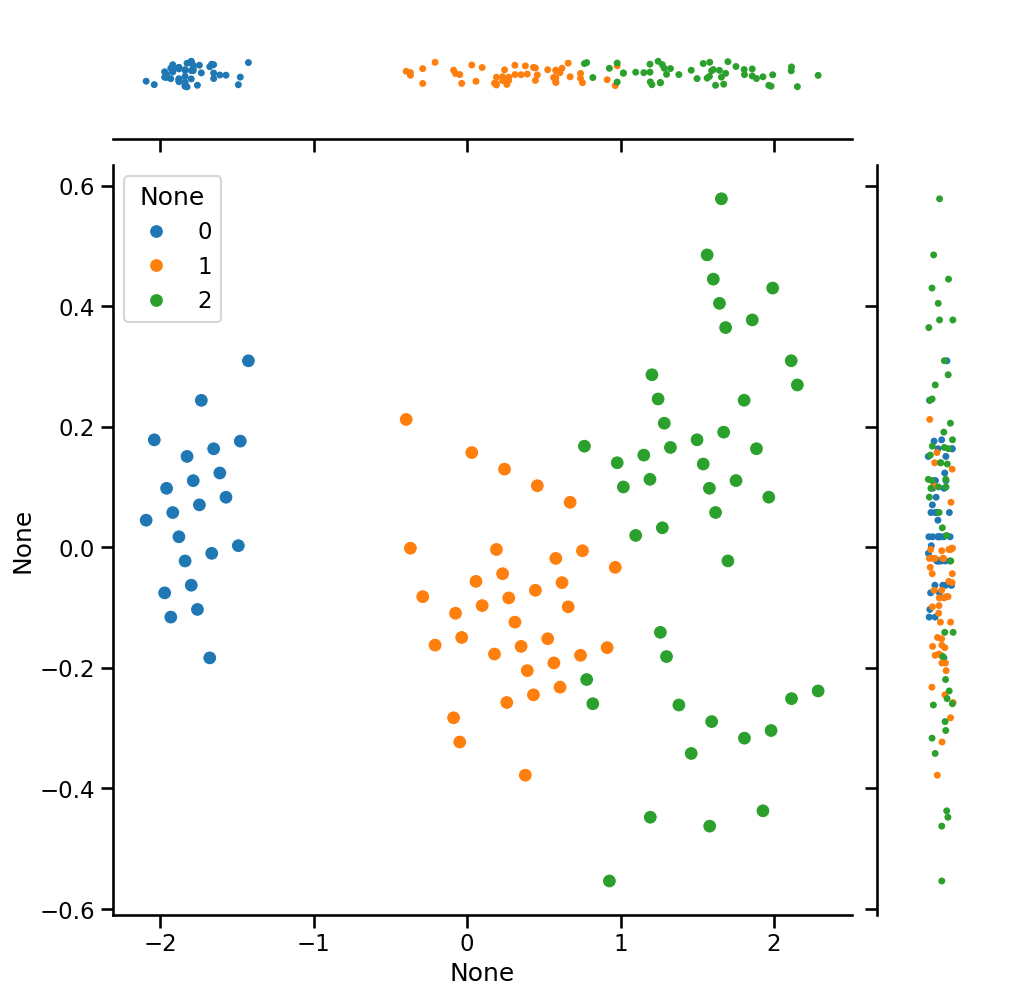

In [21]:
X_projected = pca.transform(X_standard)

g = seaborn.JointGrid(x=X_projected[:,0], y=X_projected[:,1],
                      hue=X_df.label.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

### Example 2: Projection of $\mathbb{R}^4$ onto $\mathbb{R}^2$

In the example above, we only show how principal components allow you to project a data set to *other* dimensions, but we use the same amount.

Let's now see the result of calculating the principal components using all our columns, and then how we can project that data from $\mathbb{R}^4$ to $\mathbb{R}^2$

In [22]:
X_standard2 = ((X - X.mean(axis=0)) / X.std(axis=0))

In [23]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(X_standard2)
print("Principal components")
print(pca2.components_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio
[0.72962445 0.22850762]


In [24]:
X_reduced = pca2.transform(X_standard2)

In [25]:
X_reduced

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

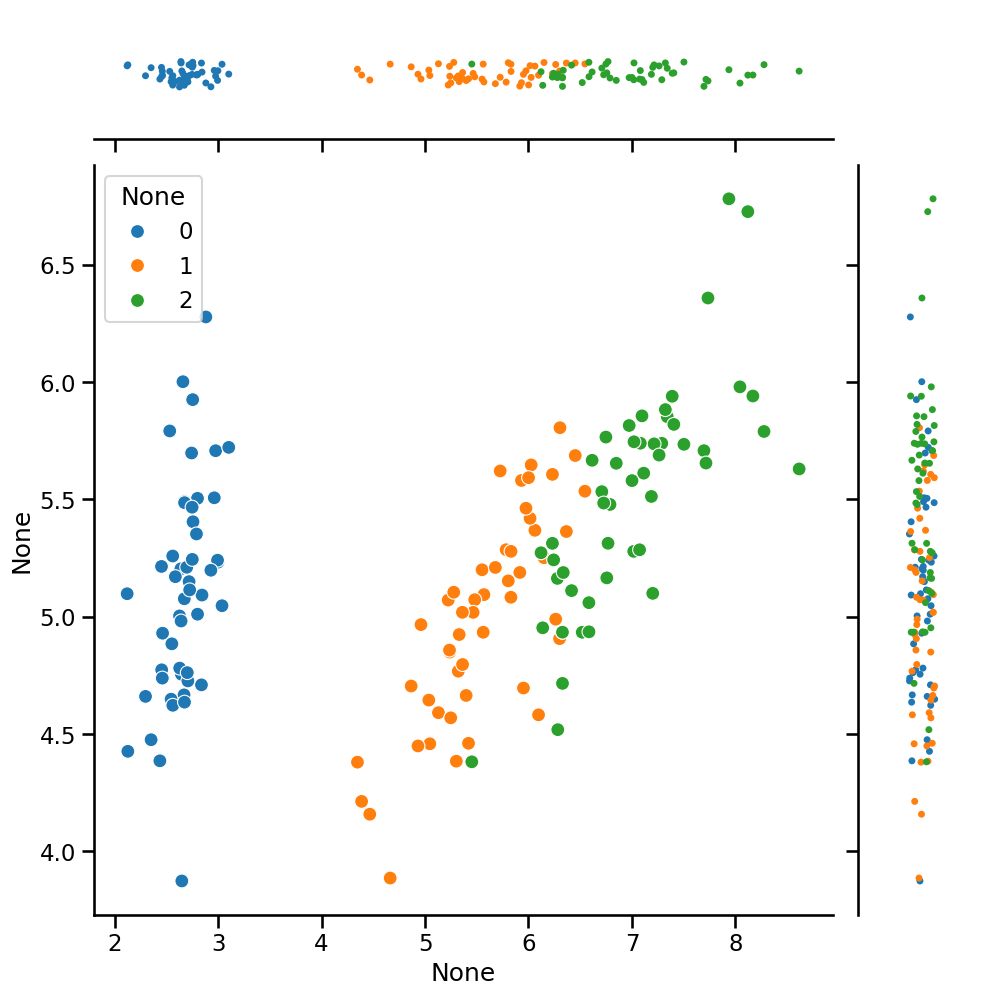

In [26]:
X_reduced = pca2.transform(X)

g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue=X_df.label.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

# PCA: Melbourn Dataframe

In [27]:
melb_df = pandas.read_csv('../data/melb_data.csv')
melb_df[:3]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [28]:
feature_cols = ['Type', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'Regionname']
feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Landsize': 202.0,
  'Regionname': 'Northern Metropolitan'},
 {'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Landsize': 156.0,
  'Regionname': 'Northern Metropolitan'}]

In [29]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

## Dimensionality reduction with PCA

In the following rows, we will apply [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca) to reduce the dimensionality of the data set to 2 dimensions. A process similar to that seen in the 06 notebook will be followed.

In [30]:
X = feature_matrix.todense()
scaled_dense_feature_matrix = ((X - X.mean(axis=0)) / X.std(axis=0))

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(np.asarray(scaled_dense_feature_matrix))
proyected_features = pca.transform(np.asarray(scaled_dense_feature_matrix))
proyected_features.shape

(13580, 10)

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18476163, 0.29321535, 0.39079947, 0.47704563, 0.56049981,
       0.6341613 , 0.70418017, 0.7712938 , 0.83818751, 0.902297  ])

Text(0.5, 0, 'Components')

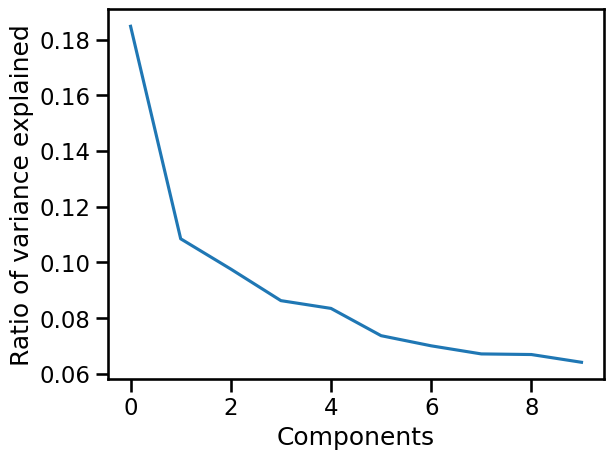

In [33]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")